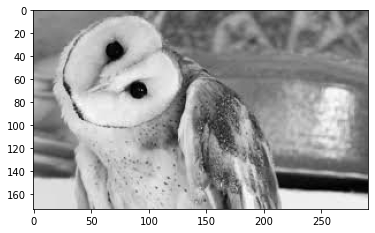

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
import cv2

datadir = 'C:/Development/AI/ai-dataanalys-BBA-ta-suniL/AI Grunder/Projekt/images'
categories = ['owl', 'woodpecker']

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [2]:
print(img_array)

[[142 142 142 ...  96  96  96]
 [142 142 142 ...  94  94  94]
 [142 142 142 ...  99  99  99]
 ...
 [219 219 219 ... 235 235 235]
 [219 219 219 ... 235 235 235]
 [219 219 219 ... 235 235 235]]


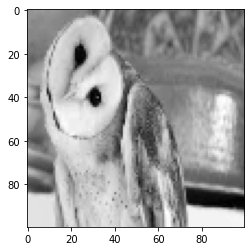

In [3]:
img_size = 100

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [4]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:   
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [5]:
print(len(training_data))

793


In [6]:
import random

random.shuffle(training_data)

In [7]:
# for sample in training_data:
#     print(sample[1])

In [8]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)
y = np.array(y)

In [9]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [24]:
# # FRÅN ANNAN FIL

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0

# # Create the model's architecture
# model = Sequential()

# # Add the first layer
# model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))

# # Add a pooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Add another convolution layer
# model.add(Conv2D(32, (5, 5), activation='relu'))

# # Add another pooling layer
# model.add(MaxPooling2D(pool_size=(2, 2)))

# # Add a flattetning layer
# model.add(Flatten())

# # Add a layer with 1000 neurons
# model.add(Dense(1000, activation='relu'))

# # Add a dropout layer
# model.add(Dropout(0.5))

# # Add a layer with 500 neurons
# model.add(Dense(500, activation='relu'))

# # Add a dropout layer
# model.add(Dropout(0.5))

# # Add a layer with 250 neurons
# model.add(Dense(250, activation='relu'))

# # Add a layer with 10 neurons
# model.add(Dense(5, activation='softmax'))

# # Compile the model
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam', metrics=['accuracy'])

# # Train the model
# hist = model.fit(x_train, y_train_one_hot, batch_size=256,
#                  epochs=4, validation_split=0.2)

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#model.add(Dense(1))
model.add(Dense(2))
model.add(Activation("sigmoid"))

model.compile(loss="mean_squared_error",
              optimizer="adam",
              metrics=['accuracy']) 

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

model.save('64x3-CNN.model')


Epoch 1/10
23/23 [==============================] - 23s 956ms/step - loss: 0.3170 - accuracy: 0.5009 - val_loss: 0.2525 - val_accuracy: 0.5125
Epoch 2/10
23/23 [==============================] - 22s 942ms/step - loss: 0.2353 - accuracy: 0.5923 - val_loss: 0.2055 - val_accuracy: 0.5000
Epoch 3/10
23/23 [==============================] - 22s 949ms/step - loss: 0.1856 - accuracy: 0.4762 - val_loss: 0.1645 - val_accuracy: 0.5500
Epoch 4/10
23/23 [==============================] - 22s 969ms/step - loss: 0.1406 - accuracy: 0.5663 - val_loss: 0.1663 - val_accuracy: 0.5500
Epoch 5/10
23/23 [==============================] - 23s 1s/step - loss: 0.0990 - accuracy: 0.5553 - val_loss: 0.1269 - val_accuracy: 0.6000
Epoch 6/10
23/23 [==============================] - 21s 925ms/step - loss: 0.0735 - accuracy: 0.6327 - val_loss: 0.1422 - val_accuracy: 0.5125
Epoch 7/10
23/23 [==============================] - 21s 927ms/step - loss: 0.0523 - accuracy: 0.5301 - val_loss: 0.1029 - val_accuracy: 0.5250
Ep

In [27]:
import cv2
import tensorflow as tf 

categories = ['woodpecker', 'owl']

def prepare(filepath):
    img_size = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size, img_size))
    return new_array.reshape(-1, img_size, img_size)

model = tf.keras.models.load_model("64x3-CNN.model")

In [28]:
prediction = model.predict([prepare('../test_images/lappuggla.jpg')])
print(categories[int(prediction[0][0])])

ValueError: in user code:

    C:\Users\S9LINOLO\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1478 predict_function  *
        return step_function(self, iterator)
    C:\Users\S9LINOLO\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\S9LINOLO\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\S9LINOLO\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\S9LINOLO\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\S9LINOLO\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1461 run_step  **
        outputs = model.predict_step(data)
    C:\Users\S9LINOLO\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1434 predict_step
        return self(x, training=False)
    C:\Users\S9LINOLO\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\S9LINOLO\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:239 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 100, 100)


In [ ]:
prediction = model.predict([prepare('../test_images/domherre.jpg')])
print(categories[int(prediction[0][0])])